In [1]:
import torch     #导入pyTorch库
import torch.nn as nn   #torch.nn提供搭建网络所需要的组件
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
# 第一步.生成数据集
# torch.rand()生成区间[0,1）内均匀分布的一组随机数Tensor
X1 = torch.rand(10000,1)    # 输入特征1
X2 = torch.rand(10000,1)    # 输入特征2
X3 = torch.rand(10000,1)    # 输入特征3
Y1 = ( (X1+X2+X3)<1 ).float()     #.float()将布尔型张量转化为浮点型张量。 # 输出特征1
Y2 = ( (1<(X1+X2+X3)) & ((X1+X2+X3)<2) ).float()     # 输出特征2
Y3 = ( (X1+X2+X3)>2 ).float()                        # 输出特征3
Data = torch.cat([X1,X2,X3,Y1,Y2,Y3],axis=1)         #数据拼接,axis=1按行拼接
#Data = Data.to('cuda:0')                        # 把数据集搬到GPU上
Data.shape

torch.Size([10000, 6])

In [4]:
Data

tensor([[0.2109, 0.6750, 0.2065, 0.0000, 1.0000, 0.0000],
        [0.4162, 0.1293, 0.3964, 1.0000, 0.0000, 0.0000],
        [0.7369, 0.9729, 0.2967, 0.0000, 0.0000, 1.0000],
        ...,
        [0.9121, 0.4670, 0.3389, 0.0000, 1.0000, 0.0000],
        [0.9928, 0.2463, 0.6664, 0.0000, 1.0000, 0.0000],
        [0.4095, 0.1770, 0.7225, 0.0000, 1.0000, 0.0000]])

In [5]:
# 划分训练集与测试集
train_size = int(len(Data) * 0.8)      # 训练集的样本数量
test_size  = len(Data) - train_size    # 测试集的样本数量
Data = Data[torch.randperm( Data.size(0)) , : ]  # 打乱样本的顺序，torch.randperm用于生成一个随机排列的整数序列
train_Data = Data[:train_size, :]    # 训练集样本
test_Data  = Data[train_size:, :]    # 测试集样本
train_Data.shape, test_Data.shape

(torch.Size([8000, 6]), torch.Size([2000, 6]))

In [6]:
# 第二步.构建神经网络
# 在PyTorch中构建神经网络需要自定义继承torch.nn.Module类，并重写forward（）方法
# 以nn.Module作为父类，我们自己的神经网络可直接继承父类的方法与属性，nn.Module中包含网络各个层的定义

#在定义的神经网络的子类中，__init__()特殊方法用于构造自己的神经网络结构，定义需要使用的层，
#forward()方法用于将输入数据进行前向传播；由于张量可以自动计算梯度，所以不需要出现反向传播
class DNN(nn.Module):

    def __init__(self):
        ''' 搭建神经网络各层 '''
# super(DNN, self).__init__()的作用是调用父类的构造函数，用于初始化继承自父类的属性和方法。
# 这样做的目的是为了确保在子类中可以继承父类的行为和特性，并实现子类自身的定制化功能。
# nn.Sequential()函数用于构建一个包含多个神经网络模块的序列模型。
# 通过将不同的神经网络模块按顺序添加到Sequential中，可以便捷地构建复杂的神经网络结构
        super(DNN,self).__init__()
        self.net = nn.Sequential(          # 按顺序搭建各层
            nn.Linear(3, 5), nn.ReLU(),    # 第1层：全连接层，后接激活函数
            nn.Linear(5, 5), nn.ReLU(),    # 第2层：全连接层
            nn.Linear(5, 5), nn.ReLU(),    # 第3层：全连接层
            nn.Linear(5, 3), #nn.ReLU(),    # 第4层：全连接层
        )

    def forward(self, x):
        ''' 前向传播 '''
        y = self.net(x)    # x即输入数据
        return y           # y即输出数据

In [7]:
model = DNN()#.to('cuda:0')     # 创建子类的实例，并搬到GPU上
model                          # 查看该实例的各层，bias=True，为该层添加一个偏置

DNN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [8]:
# 查看内部参数（非必要）
for name, param in model.named_parameters():
    print(f"参数:{name}\n形状:{param.shape}\n数值:{param}\n")

# net.0.weight 的权重形状为[5, 3]，5 表示它自己的节点数是 5，3 表示与之连接的前一层的节点数为 3
# requires_grad=True，说明所有需要进行反向传播的内部参数（即权重与偏置）都打开了张量自带的梯度计算功能

参数:net.0.weight
形状:torch.Size([5, 3])
数值:Parameter containing:
tensor([[ 0.2709, -0.1700,  0.1887],
        [-0.0301,  0.2321,  0.2491],
        [ 0.4334,  0.1093,  0.3158],
        [ 0.1351, -0.5496,  0.1050],
        [-0.4950,  0.2623, -0.1704]], requires_grad=True)

参数:net.0.bias
形状:torch.Size([5])
数值:Parameter containing:
tensor([ 0.2235, -0.4220,  0.4201, -0.5050, -0.1823], requires_grad=True)

参数:net.2.weight
形状:torch.Size([5, 5])
数值:Parameter containing:
tensor([[-0.0234, -0.1033, -0.0652,  0.2520, -0.0041],
        [-0.2182,  0.1131,  0.3283,  0.4316, -0.0975],
        [ 0.4465,  0.3908,  0.2723, -0.2595, -0.1227],
        [-0.1811,  0.0044,  0.1680, -0.0729,  0.2755],
        [-0.0269, -0.1107,  0.3012,  0.4405,  0.1955]], requires_grad=True)

参数:net.2.bias
形状:torch.Size([5])
数值:Parameter containing:
tensor([ 0.3981,  0.0574, -0.4006,  0.2576, -0.2836], requires_grad=True)

参数:net.4.weight
形状:torch.Size([5, 5])
数值:Parameter containing:
tensor([[ 0.1993,  0.4470,  0.0890, -0.34

In [9]:
# 损失函数的选择,
# 常用的损失函数有torch.nn.MSELoss() 常用于回归任务，torch.nn.CrossEntropyLoss()常用于分类任务
loss_fn = nn.MSELoss()

In [10]:
# 优化算法的选择  常用优化器有SGD和Adam，
learning_rate = 0.01    # 设置学习率
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

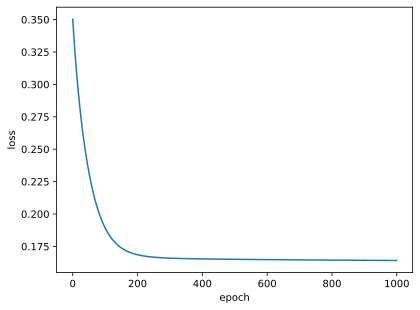

In [11]:
# 第三步.训练网络
epochs = 1000
losses = []      # 创建列表来记录损失函数变化

# 给训练集划分输入与输出
X = train_Data[:, :3]      # 前3列为输入特征
Y = train_Data[:, -3:]     # 后3列为输出特征

for epoch in range(epochs):       #range(epochs)是[0,1,2,...,epochs-1]的列表
    Pred = model(X)               # 一次前向传播（BGD），预测值Pred
    loss = loss_fn(Pred, Y)       # 计算损失函数
    
# loss.item()是将PyTorch中的损失张量转换为Python的标量，.append()是一个列表对象的方法，
# 用于在列表的末尾添加一个新元素，利用append()方法将该标量值添加到名为losses的列表中,
    losses.append(loss.item())    # 记录损失函数的变化
    
# 在优化器调用.step前应调用optimmizer.zero_grad()清空上一轮梯度，
# 调用loss.backward()计算梯度，再调用optimizer.step()优化参数    
    optimizer.zero_grad()         # 清理上一轮滞留的梯度
    loss.backward()               # 一次反向传播
    optimizer.step()              # 优化内部参数

Fig = plt.figure()                #做Loss和epoch的图
plt.plot(range(epochs), losses)   #plt.plot（纵轴量，横轴量）
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# 第四步.测试网络

# 给测试集划分输入与输出
X = test_Data[:, :3]      # 前3列为输入特征
Y = test_Data[:, -3:]     # 后3列为输出特征

with torch.no_grad():     # 该局部关闭梯度计算功能
    Pred = model(X)       # 一次前向传播（批量）
    
#由于输出特征是独热编码，预测值是接近0或1的小数，对预测值进行规整，将每行最大数置1，将不是1的数字置0
    Pred[:,torch.argmax(Pred, axis=1)] = 1
    Pred[Pred!=1] = 0
#（Pred==Y）计算预测的输出与真实的输出的各个元素是否相等，返回3000*3的布尔型张量
# (Pred == Y).all(1)按行扫描检测布尔型张量的每一行的3个数据是否都是True，返回一个3000*1的张量
    correct = torch.sum( (Pred == Y).all(1) )    # 预测正确的样本
    total = Y.size(0)                            # 全部的样本数量
    print(f'测试集精准度: {100*correct/total} %')

测试集精准度: 67.05000305175781 %


In [13]:
# 保存网络
torch.save(model, 'model03.pth')

In [14]:
# 直接把模型赋给新网络
new_model = torch.load('model03.pth')

In [17]:
# 测试网络
# 给测试集划分输入与输出
X = test_Data[:, :3]      #前3列为输入特征
Y = test_Data[:, -3:]     #后3列为输出特征

with torch.no_grad():     #该局部关闭梯度计算功能
    Pred = new_model(X)       #用新模型进行一次前向传播
    Pred[:,torch.argmax(Pred, axis=1)] = 1
    Pred[Pred!=1] = 0
    correct = torch.sum( (Pred == Y).all(1) )    #预测正确的样本
    total = Y.size(0)                            #全部的样本数量
    print(f'测试集精准度: {100*correct/total} %')

测试集精准度: 67.05000305175781 %
